In [29]:
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('diabetes.csv')

In [31]:
df.head()

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,72,33.6,50,1
1,85,66,26.6,31,0
2,183,64,23.3,32,1
3,89,66,28.1,21,0
4,137,40,43.1,33,1


In [32]:
df.columns

Index(['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome'], dtype='object')

In [33]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending = False)

Outcome          1.000000
Glucose          0.466581
BMI              0.292695
Age              0.238356
BloodPressure    0.065068
Name: Outcome, dtype: float64

In [34]:
X = df[['Glucose', 'BloodPressure','BMI', 'Age']]

In [35]:
Y = df[['Outcome']]

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [37]:
# Create a logistic regression object and fit it to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Meet Zaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model:- LogisticRegression \nAccuracy:-", accuracy)

Model:- LogisticRegression 
Accuracy:- 0.7077922077922078


In [41]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X, Y)

# Plot the data points
plt.scatter(Y[:,0], Y[:,1], c=y)

# Plot the decision boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='r')

plt.show()
# In this example, we generate some random data with two input features (X[:,0] and X[:,1]) and a binary target variable (y). We then train a logistic regression model on this data using LogisticRegression() and model.fit(X, y). Next, we plot the data points using plt.scatter() and define a set of points at which to evaluate the model's predictions using np.meshgrid(). We then use the trained model to make predictions on these points using model.predict(), and reshape the resulting array so that it can be plotted using plt.contour(). The resulting plot will show the decision boundary separating the two classes of data points.

C:\Users\Meet Zaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


InvalidIndexError: (slice(None, None, None), 0)

import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output1.html")

import joblib
joblib.dump(logreg, "diabetes_model.joblib")

In [12]:
import matplotlib.pyplot as plt


In [15]:
print(df.shape)


(768, 5)


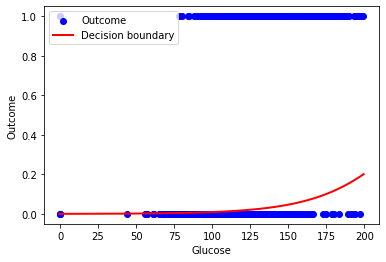

In [46]:
import numpy as np
import matplotlib.pyplot as plt


def logistic(z):
    return 1 / (1 + np.exp(-z))


X = df[['Glucose', 'BloodPressure', 'BMI', 'Age']].values
y = df['Outcome'].values


model = LogisticRegression()
model.fit(X, y)


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5


xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
yy = logistic(model.coef_[0][0] * xx + model.intercept_).ravel()


plt.scatter(X[:, 0], y, color='blue', marker='o', label='Outcome')
plt.plot(xx, yy, color='red', linewidth=2, label='Decision boundary')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.legend(loc='upper left')
plt.show()
